In [90]:
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('seaborn-white')
sns.set_color_codes()
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from matplotlib.widgets import Slider, Button, RadioButtons
from matplotlib.ticker import FormatStrFormatter
from IPython.display import Image

I was responsible for gathering the data from the Crime Victimization Survey.  This notebook consists of my findings, which found interesting trends in sexual assault reportings, and visualizations of data that explains how violent victimization case reportings are affected over the years, and by certain groups of people. 

The NCVS is a nationally representative sample of about 90,000 households, comprising nearly 160,000 persons, on the frequency, characteristics, and consequences of criminal victimization in the United States. The NCVS collects information on nonfatal personal crimes (rape or sexual assault, robbery, aggravated and simple assault, and personal larceny) and household property crimes (burglary, motor vehicle theft, and other theft) both reported and not reported to police. 


I generated the initial data from the Bureau of Justice Statistics here: https://www.bjs.gov/index.cfm?ty=nvat.  The data I collected ranged from 1993-2015, and provided lots of different information.  I attached an image of what one data query would result in.  

Citation: Bureau of Justice Statistics. Number of rape/sexual assaults, robberies, aggravated assaults, and  simple assaults,  1993-2015).

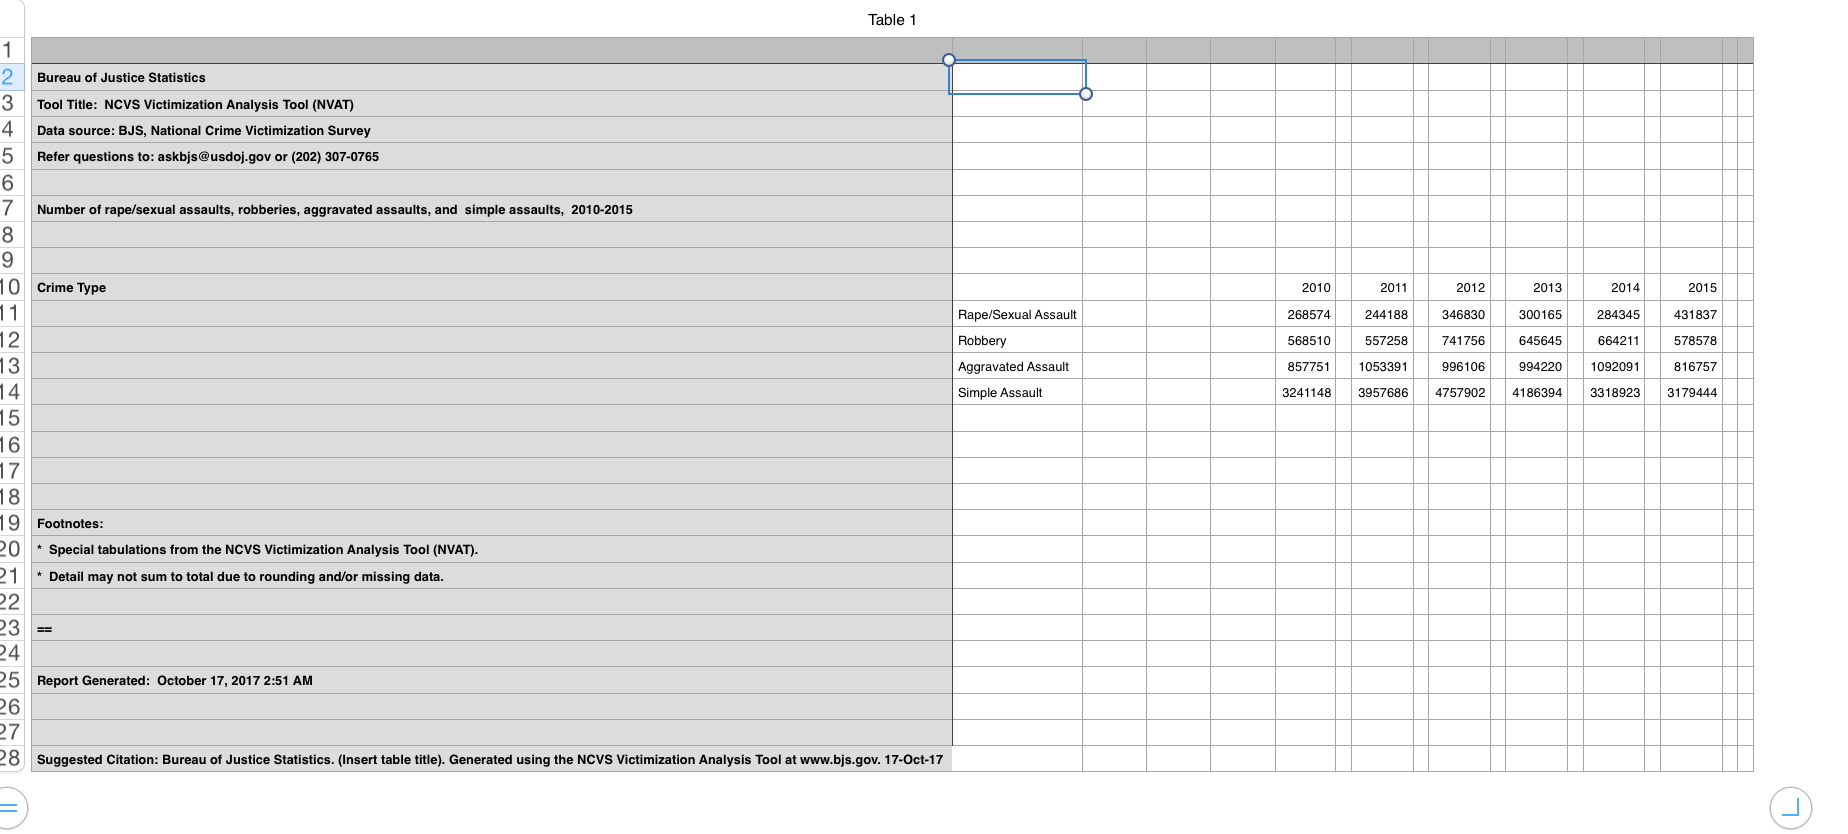

In [91]:
Image("ex_img.png")

I cleaned up several different data queries into tables that could be read into this notebook. 


I first examined the data of different crime types, by the number of cases reported each year from 1993 to 2015.  

Crime Type,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Rape/Sexual Assault,898239,674291,563249,437198,553523,391101,591460,366747,476578,349805,325311,255769,207760,463598,248277,349691,305574,268574,244188,346830,300165,284345,431837
Robbery,1752667,1675840,1350577,1425448,1188879,970713,1019159,886123,667736,624391,708376,616419,769148,932397,775522,679789,635073,568510,557258,741756,645645,664211,578578
Aggravated Assault,3481055,3412978,2894387,2877246,2895381,2318424,1961820,1564737,1383667,1332518,1362267,1418657,1281491,1753819,1218923,969216,1029273,857751,1053391,996106,994220,1092091,816757
Simple Assault,10690657,11295896,10393989,9319628,8787623,8330313,7028277,5684995,4948619,5117836,5283096,4435215,4689395,5280616,4571462,4394774,3699316,3241148,3957686,4757902,4186394,3318923,3179444


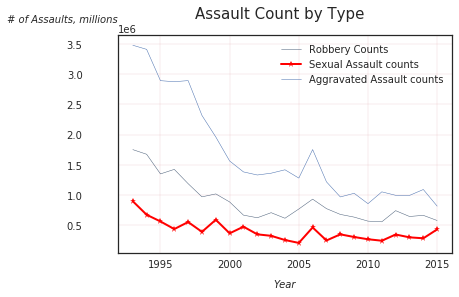

In [106]:
violent_victimization_counts = Table.read_table(
    "rape_robberies_aggravated_assaults_simple_assaults.csv")
violent_victimization_counts.show()
years = violent_victimization_counts.labels
years = years[::3]
#violent_victimization_counts.select(years).barh("Crime Type")


plot_years = violent_victimization_counts.labels[1:]

# Create table for sexual assault cases ranging from 1993 to 2015
sexual_assault_count = make_array()
for i in np.arange(len(violent_victimization_counts.row(0))-1):
    new_year = violent_victimization_counts.row(0)[i+1]
    sexual_assault_count = np.append(sexual_assault_count, new_year)
#Table().with_column("Year", plot_years, "Count", sexual_assault_count).plot("Year", "Count")

# Create table for aggravated assault cases ranging from 1993 to 2015
agg_assault_count = make_array()
for i in np.arange(len(violent_victimization_counts.row(0))-1):
    new_year = violent_victimization_counts.row(2)[i+1]
    agg_assault_count = np.append(agg_assault_count, new_year)
#Table().with_column("Year", plot_years, "Count", sexual_assault_count).plot("Year", "Count")

#Do the calculation for robbery cases ranging from 1993 to 2015
robbery_count = make_array()
for i in np.arange(len(violent_victimization_counts.row(0))-1):
    new_year = violent_victimization_counts.row(1)[i+1]
    robbery_count = np.append(robbery_count, new_year)
        
    
count = Table().with_column("Year", plot_years, "Count", robbery_count).plot("Year", "Count", linewidth = 0.5)

plt.ylabel("# of Assaults, millions", rotation = "horizontal", position=(0,1.05), fontsize = 10, fontstyle = "italic")
plt.plot(plot_years, sexual_assault_count, color = "red", linewidth = 2.0, label = "Sexual Assault Count", marker = "*")
plt.plot(plot_years, agg_assault_count, linewidth = 0.5)
plt.xlabel("Year", fontsize= 10, fontstyle = "italic", labelpad=10)
plt.axis("normal")
plt.legend(['Robbery Counts', 'Sexual Assault counts', "Aggravated Assault counts"], loc='upper right')
plt.suptitle("Assault Count by Type", fontsize = 15)
plt.tick_params(axis='y', which='major',direction='out', pad=35)
#plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.grid(color='r', linestyle='-', linewidth=0.1)


This data looked strange to me.  I was curious about the spikes in the data, as well as reasons why sexual assault counts were much lower than other types of account.  Is that an accurate reflection of sexual assault counts?  Researching online, I found that sexual assault data collection is a source of a lot of controversy.  There is a discrepancy between the amount of sexual assault crimes that are reported versus the amount that are known to have happened.  

An example can be seen in the above graph, for the year 2007, where you can see that the graphs jumped.  This is not reflective of 2007 being a crime-ridden year -- rather, it's a year when the National Crime Victimization Survey changed its methodology:

Prior to this study, national information about rape was limited to data on reported rapes from the FBI Uniform Crime Reports or data from the Bureau of Justice Statistics, National Crime Survey (NCS) on reported and unreported rapes in the past year. The number of rapes per year in Rape in America was approximately five times higher than the Uniform Crime Reports or the NCS. Recently, the NCS has been redesigned amid concerns that it failed to detect a substantial proportion of rape cases. 

The authors say in the report that the higher numbers may reflect the new, more accurate methodology rather than an actual increase. Two major shifts were to describe types of sexual assault to those being interviewed, and to replace "computer-assisted telephone interviews conducted from two telephone centers" nationwide with interviews "by field representatives either by telephone or in person."

More information about the topic can be found here: https://mainweb-v.musc.edu/vawprevention/research/sa.shtml

I next wanted to look at different cases being reported in the 4 regions of the United States where data was collected: the Northeast, Midwest, South and West.  I visualized this in a simple bar chart, with total reportings in a bar on the left, and each of the regions represented in bars to the right.  I did the for the years 1997, 2007, and 2015.  Throughout this time period, the south continuously had the highest reported crime numbers, but its deviation from other regions in the world varied over time.

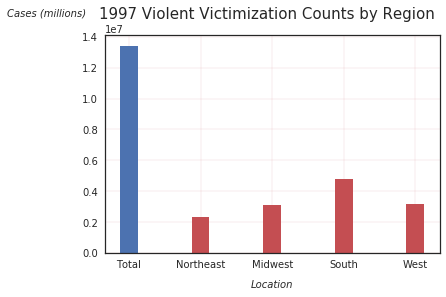

In [171]:
violent_victimization_region = Table.read_table(
    "violent_victimizations_by_region.csv")
violent_victimization_region = violent_victimization_region.column("1997")

y_data = [int(numeric_string) for numeric_string in violent_victimization_region]

x_axis = ["Total", "Northeast", "Midwest", "South", "West"]

width = 0.25
Table().with_column("Location", x_axis, "Violent Victimizations", y_data)
indices = np.arange(5)
p1 = plt.bar(indices, y_data, width, color= ['b','r', 'r', 'r', 'r'])
plt.xticks(indices, x_axis, fontstyle='normal')
plt.xlabel("Location", fontsize=10,fontstyle= 'italic', labelpad=10 )
plt.suptitle("1997 Violent Victimization Counts by Region", fontsize = 15)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tick_params(axis='y', which='major',direction='out')
plt.ylabel("Cases (millions)", rotation = "horizontal", position=(0,1.08), fontsize =10, fontstyle = "italic", labelpad=35)
plt.grid(color='r', linestyle='-', linewidth=0.1)



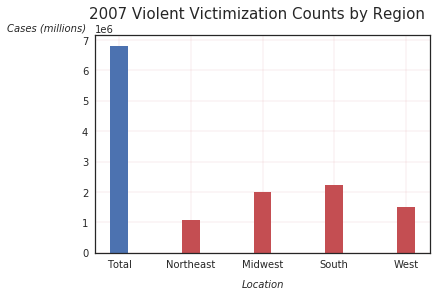

In [170]:
violent_victimization_region = Table.read_table(
    "violent_victimizations_by_region.csv")
violent_victimization_region = violent_victimization_region.column("2007")

y_data = [int(numeric_string) for numeric_string in violent_victimization_region]

x_axis = ["Total", "Northeast", "Midwest", "South", "West"]

width = 0.25
Table().with_column("Location", x_axis, "Violent Victimizations", y_data)
indices = np.arange(5)
p1 = plt.bar(indices, y_data, width, color= ['b','r', 'r', 'r', 'r'])
plt.xticks(indices, x_axis, fontstyle='normal')
plt.xlabel("Location", fontsize=10,fontstyle= 'italic', labelpad=10 )
plt.suptitle("2007 Violent Victimization Counts by Region", fontsize = 15)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tick_params(axis='y', which='major',direction='out')
plt.ylabel("Cases (millions)", rotation = "horizontal", position=(0,1.01), fontsize =10, fontstyle = "italic", labelpad=35)
plt.grid(color='r', linestyle='-', linewidth=0.1)



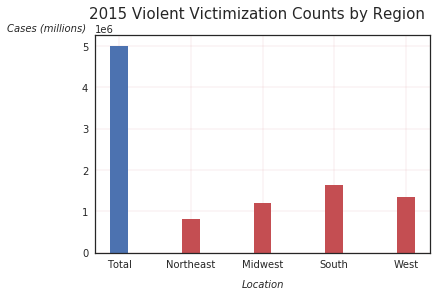

In [169]:
violent_victimization_region = Table.read_table(
    "violent_victimizations_by_region.csv")
violent_victimization_region = violent_victimization_region.column("2015")

y_data = [int(numeric_string) for numeric_string in violent_victimization_region]

x_axis = ["Total", "Northeast", "Midwest", "South", "West"]

width = 0.25
Table().with_column("Location", x_axis, "Violent Victimizations", y_data)
indices = np.arange(5)
p1 = plt.bar(indices, y_data, width, color= ['b','r', 'r', 'r', 'r'])
plt.xticks(indices, x_axis, fontstyle='normal')
plt.xlabel("Location", fontsize=10,fontstyle= 'italic', labelpad=10 )
plt.suptitle("2015 Violent Victimization Counts by Region", fontsize = 15)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tick_params(axis='y', which='major',direction='out')
plt.ylabel("Cases (millions)", rotation = "horizontal", position=(0,1.01), fontsize =10, fontstyle = "italic", labelpad=35)
plt.grid(color='r', linestyle='-', linewidth=0.1)



I thought it would be interesting to plot this in a line graph as well, showing the trend in reporting for all four regions over time. We see that the south continuously remains above the rest.

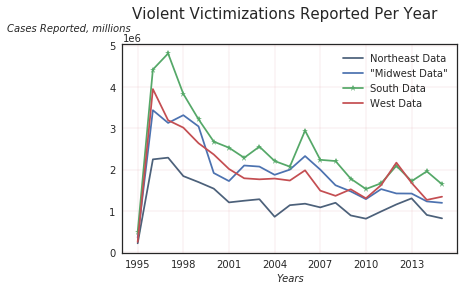

In [212]:
violent_victimization_region = Table.read_table(
    "violent_victimizations_by_region.csv")

ne_data = make_array()
mw_data = make_array()
south_data = make_array()
west_data = make_array()

for i in np.arange(len(violent_victimization_region.labels)):
    ne_data = np.append(ne_data, violent_victimization_region.row(1)[i])
    mw_data = np.append(mw_data, violent_victimization_region.row(2)[i])
    south_data = np.append(south_data, violent_victimization_region.row(3)[i])
    west_data = np.append(west_data, violent_victimization_region.row(4)[i])

plot_years = violent_victimization_counts.labels[3:]


#turn string arrays into int arrays
plot_years = [int(numeric_string) for numeric_string in plot_years[0:]]
ne_data = [int(numeric_string) for numeric_string in ne_data[3:]]
mw_data = [int(numeric_string) for numeric_string in mw_data[3:]]
south_data = [int(numeric_string) for numeric_string in south_data[3:]]
west_data = [int(numeric_string) for numeric_string in west_data[3:]]

count = Table().with_column("Years", plot_years, "Northeast Data", ne_data).plot("Years", "Northeast Data")

plt.xticks(plot_years)
plt.locator_params(axis='x', nbins=10)
plt.plot(plot_years, mw_data)
plt.plot(plot_years, south_data, marker = "*")
plt.plot(plot_years, west_data)
plt.ylabel("Cases Reported, millions", rotation = "horizontal", position=(0,1.05), fontsize =10, fontstyle = "italic", labelpad=40)
plt.xlabel("Years", fontsize =10, fontstyle = "italic")
plt.suptitle("Violent Victimizations Reported Per Year", fontsize = 15)
plt.legend(['Northeast Data', '"Midwest Data"', "South Data", "West Data"], loc='upper right')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tick_params(axis='y', which='major',direction='out')
plt.subplots_adjust(top=0.85)
plt.grid(color='r', linestyle='-', linewidth=0.1)



I wanted to see whether the trend would continue if we just looked at just one set of people.  I collected data specifically from unmarried and married women.  In the following graph, I separated the never married women data from the married, and specifically plotted the trendline for never married women.  We see that there was a steady decline in reported assault cases over the years. 

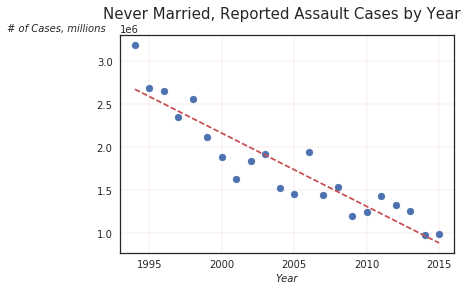

In [195]:
violent_victimization_marriage = Table.read_table(
    "violent_victimizations_marital_status_and_reporting_to_police.csv")
plot_years = violent_victimization_marriage.labels[2:]

never_married = violent_victimization_marriage.drop([1][0])
never_married[0][1] = "Never Married Total"
never_married[0][2] = "Never Married, Reported"
never_married[0][3] = "Never Married, Did Not Report"
never_married[0][4] = "Never Married, Do Not Know"
never_married = never_married.where("Crime Type", are.containing("Never Married"))
                      
reported = make_array()
no_report = make_array()
dk = make_array()

for i in np.arange(len(never_married)):
    reported = np.append(reported, never_married.column(i)[1])
    no_report = np.append(no_report, never_married.column(i)[2])
    dk = np.append(dk, never_married.column(i)[3])

    
plot_years = [int(numeric_string) for numeric_string in plot_years[1:]]
reported = [int(numeric_string) for numeric_string in reported[1:]]
no_report = [int(numeric_string) for numeric_string in no_report[1:]]
dk = [int(numeric_string) for numeric_string in dk[1:]]

never_married_table = Table().with_column("Year", plot_years).with_column("Reported", reported[1::]).with_column(
    "Did not report", no_report[1::]).with_column("Do not know", dk[1::])

width = 0.25

p1 = plt.scatter(plot_years, reported[1::])

plt.ylabel("# of Cases, millions", rotation = "horizontal", position=(-1.2,1.01), fontsize = 10, fontstyle = "italic", labelpad = 40)
plt.xlabel("Year", fontsize= 10, fontstyle = "italic")



z = np.polyfit(plot_years, reported[1::], 1)
p = np.poly1d(z)
plt.plot(plot_years,p(plot_years),"r--")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.suptitle("Never Married, Reported Assault Cases by Year", fontsize = 15)

plt.grid(color='r', linestyle='-', linewidth=0.1)

plt.show()

In [203]:
married = Table.read_table(
    "violent_victimizations_marital_status_and_reporting_to_police.csv")

In [204]:
married = violent_victimization_marriage.drop([1][0])
married[0][5] = "Married, Total Count"
married[0][6] = "Married, Reported"
married[0][7] = "Married, Did Not Report"
married[0][8] = "Married, Do Not Know"
married = married.where("Crime Type", are.containing("Married,"))

nvr_married = violent_victimization_marriage.drop([1][0])
nvr_married[0][1] = "Never Married, Total Count"
nvr_married[0][2] = "Never Married, Reported"
nvr_married[0][3] = "Never Married, Did Not Report"
nvr_married[0][4] = "Never Married, Do Not Know"
nvr_married = nvr_married.where("Crime Type", are.containing("Never Married,"))
nvr_married

nvr_married_reported = nvr_married.row(1)[1::]
nvr_married_reported = [int(numeric_string) for numeric_string in nvr_married_reported]
nvr_married_not_reported = nvr_married.row(2)[1::]
nvr_married_not_reported = [int(numeric_string) for numeric_string in nvr_married_not_reported]
nvr_married_dk = nvr_married.row(3)[1::]
nvr_married_dk =[int(numeric_string) for numeric_string in nvr_married_dk]

After recognizing that a declining trend exists for the cases reported by unmarried women, my next step was to compare umarried and married reporting cases directly.

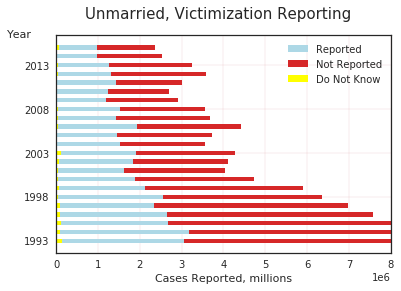

In [213]:
ind = (np.arange(1993, 2016))   # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, nvr_married_reported, width, color='#add8e6')
p2 = plt.barh(ind, nvr_married_not_reported, width,color = '#d62728', left = nvr_married_reported)
p3 = plt.barh(ind, nvr_married_dk, width, color = "#ffff00")


plt.ylabel('Year', rotation = "horizontal", position = (0.98,0.98))
plt.xlabel('Cases Reported, millions')

plt.yticks(ind[::5])
plt.legend((p1[0], p2[0], p3[0]), ('Reported', 'Not Reported', "Do Not Know"))
plt.xlim([0, 8000000])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.suptitle('Unmarried, Victimization Reporting', fontsize = 15)
plt.grid(color='r', linestyle='-', linewidth=0.1)



I will have two graphs side by side, one of NEVER MARRIED reported and not reported cases, the other of MARRIED reported and not reported cases.

In [206]:
married_reported = married.row(1)[1::]
married_reported = [int(numeric_string) for numeric_string in married_reported]
married_not_reported = married.row(2)[1::]
married_not_reported = [int(numeric_string) for numeric_string in married_not_reported]
married_dk = married.row(3)[1::]
married_dk =[int(numeric_string) for numeric_string in married_dk]


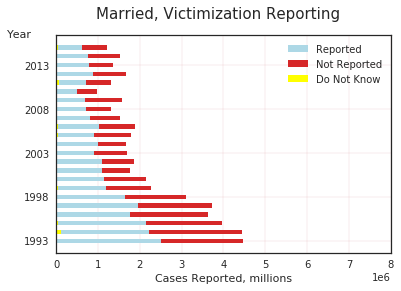

In [214]:
ind = (np.arange(1993, 2016))   # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, married_reported, width, color='#add8e6')
p2 = plt.barh(ind, married_not_reported, width, color = '#d62728', left = married_reported)
p3 = plt.barh(ind, married_dk, width, color = "#ffff00")


plt.ylabel('Year', rotation = "horizontal", position = (0.98,0.98))
plt.xlabel('Cases Reported, millions')
plt.yticks(ind[::5])
plt.legend((p1[0], p2[0], p3[0]), ('Reported', 'Not Reported', "Do Not Know"))
plt.xlim([0, 8000000])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.suptitle('Married, Victimization Reporting', fontsize = 15)

plt.grid(color='r', linestyle='-', linewidth=0.1)


This revealed something  interesting.   The amount of cases TOTAL accounted for of violent victimizations was much higher for unmarried women in general -- however, the number of cases REPORTED for unmarried women compared to married women is relatively similar.  The increase in cases of violent victimization against unmarried women also reflected less of these unmarried women reporting their experiences of violent victimization.